<a href="https://colab.research.google.com/github/UFM-Market-Trends/UFM-Market-Trends-SDK/blob/main/examples/3_Inflaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install pyxlsb
import datetime
!pip install git+https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git
import ufmtrends_sdk as trends
today = datetime.date.today().strftime("%Y-%m-%d")
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to /tmp/pip-req-build-_z7wxksd
  Running command git clone -q https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git /tmp/pip-req-build-_z7wxksd
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# https://colab.research.google.com/notebooks/snippets/gcs.ipynb
from google.colab import auth
auth.authenticate_user()

project_id = 'ufm-market-trends'
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
LOWER_BOUND_INFLATION_TARGET = 0.03
UPPER_BOUND_INFLATION_TARGET = 0.05

## Inflación subyacente
* https://www.banguat.gob.gt/es/page/inflacion-subyacente-interanual
* Fuente: Instituto Nacional de Estadística (INE) y  Banco de Guatemala.	

In [ ]:
underlying_inflation_url = "https://www.banguat.gob.gt/sites/default/files/banguat/imm/imm73.xlsx"

UNDERLYING_INFLATION = "Inflación subyacente"
def download_underlying_inflation(url):

  df = pd.read_excel(url,
                     skiprows=6,
                     skipfooter=4)
  df = df.iloc[:,1:]

  df = df.transpose().stack().reset_index()
  month_rows = np.arange(0,12)
  df = df.drop(month_rows).reset_index(drop=True)
  df.columns = ['date', 'month', UNDERLYING_INFLATION] 

  start_year = 2002

  start_date = datetime.datetime(year=start_year, 
                                 month=1,
                                 day=1)


  months_amount = len(df["month"])
  months = pd.period_range(start_date, periods=months_amount, freq='M')

  df["date"] = pd.PeriodIndex(months, freq='M').to_timestamp()
  df["month"] = months

  return df



underlying_inflation_df = download_underlying_inflation(underlying_inflation_url)

underlying_inflation_df

,date,month,Inflación subyacente
0,2002-01-01,2002-01,7.373405
1,2002-02-01,2002-02,7.676759
2,2002-03-01,2002-03,7.693315
3,2002-04-01,2002-04,7.731781
4,2002-05-01,2002-05,7.522233
...,...,...,...
240,2022-01-01,2022-01,3.29
241,2022-02-01,2022-02,3.37
242,2022-03-01,2022-03,3.47
243,2022-04-01,2022-04,3.71


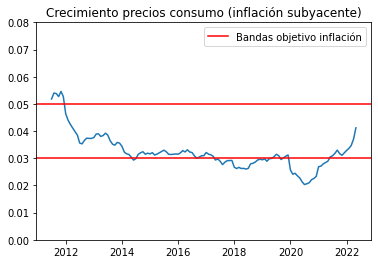

In [ ]:
last_many_months = -12 * 11 + 1

UNDERLYING_INFLATION_GROWTH = 'Crecimiento inflación subyacente'

inflation_data = {
    'labels': underlying_inflation_df['month'][last_many_months:].astype(str),
    'dates': underlying_inflation_df['date'][last_many_months:],
    UNDERLYING_INFLATION_GROWTH: np.array(
        underlying_inflation_df[UNDERLYING_INFLATION][last_many_months:]
        ) / 100
}

plt.plot(inflation_data['dates'],
         inflation_data[UNDERLYING_INFLATION_GROWTH])
plt.title("Crecimiento precios consumo (inflación subyacente)")
plt.axhline(LOWER_BOUND_INFLATION_TARGET, color='r', 
            label='Bandas objetivo inflación')
plt.axhline(UPPER_BOUND_INFLATION_TARGET, color='r')
plt.legend()
plt.ylim(0,0.08)
plt.show()

## Inflación total
* https://www.banguat.gob.gt/page/inflacion-total
* Fuente INE

In [ ]:
total_inflation_url = "https://www.banguat.gob.gt/sites/default/files/banguat/imm/imm01.xls"

TOTAL_INFLATION = "Inflación total"
def download_total_inflation(url):

  df = pd.read_excel(url,
                     skiprows=5,
                     skipfooter=1)

  df = df.transpose().stack().reset_index()
  month_rows = np.arange(0,12)
  df = df.drop(month_rows).reset_index(drop=True)
  df.columns = ['date', 'month', TOTAL_INFLATION] 

  start_year = 1996

  start_date = datetime.datetime(year=start_year, 
                                 month=1,
                                 day=1)


  months_amount = len(df["month"])
  months = pd.period_range(start_date, periods=months_amount, freq='M')

  df["date"] = pd.PeriodIndex(months, freq='M').to_timestamp()
  df["month"] = months

  return df



total_inflation_df = download_total_inflation(total_inflation_url)

total_inflation_df

,date,month,Inflación total
0,1996-01-01,1996-01,9.759805
1,1996-02-01,1996-02,10.829774
2,1996-03-01,1996-03,11.47541
3,1996-04-01,1996-04,11.946369
4,1996-05-01,1996-05,11.015439
...,...,...,...
312,2022-01-01,2022-01,2.87
313,2022-02-01,2022-02,2.98
314,2022-03-01,2022-03,4.17
315,2022-04-01,2022-04,4.62


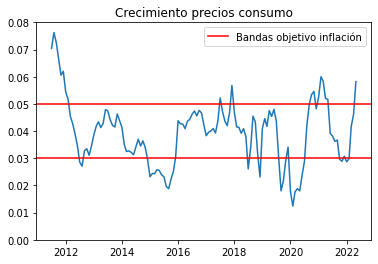

In [ ]:
TOTAL_INFLATION_GROWTH = 'Crecimiento inflación total'
inflation_data[TOTAL_INFLATION_GROWTH] = (np.array(
        total_inflation_df[TOTAL_INFLATION][last_many_months:]) / 100
)

plt.plot(inflation_data['dates'],
         inflation_data[TOTAL_INFLATION_GROWTH])
plt.title("Crecimiento precios consumo")
plt.axhline(LOWER_BOUND_INFLATION_TARGET, color='r', 
            label='Bandas objetivo inflación')
plt.axhline(UPPER_BOUND_INFLATION_TARGET, color='r')
plt.legend()
plt.ylim(0,0.08)
plt.show()

In [ ]:
inflation_data_csv = "Inflacion.csv"
inflation_data_df = pd.DataFrame(inflation_data)
inflation_data_df.iloc[:,2:] *= 100
inflation_data_df['Banda objetivo inflación superior'] = UPPER_BOUND_INFLATION_TARGET * 100
inflation_data_df['Banda objetivo inflación inferior'] = LOWER_BOUND_INFLATION_TARGET * 100
inflation_data_df.to_csv(inflation_data_csv, index=False)

In [ ]:
bucket_path = 'ufm-market-trends/guatemala/inflacion'
csv_file = inflation_data_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Inflacion.csv [Content-Type=text/csv]...
/ [1 files][  6.4 KiB/  6.4 KiB]                                                
Operation completed over 1 objects/6.4 KiB.                                      
Copying gs://ufm-market-trends/guatemala/inflacion/Inflacion.csv [Content-Type=text/csv]...
/ [1 files][  6.4 KiB/  6.4 KiB]                                                
Operation completed over 1 objects/6.4 KiB.                                      
labels,dates,Crecimiento inflación subyacente,Crecimiento inflación total,Banda objetivo inflación superior,Banda objetivo inflación inferior
2011-07,2011-07-01,5.18,7.0396744659206405,5.0,3.0
2011-08,2011-08-01,5.4,7.625826131164202,5.0,3.0
2011-09,2011-09-01,5.38,7.249315624049486,5.0,3.0
2011-10,2011-10-01,5.27,6.65,5.0,3.0
2011-11,2011-11-01,5.46,6.054843875100062,5.0,3.0
2011-12,2011-12-01,5.27,6.200000000000003,5.0,3.0
2012-01,2012-01-01,4.64,5.44,5.0,3.0
2012-02,2012-02-01,4.4,5.17,5.0,3.0
2012-03,2012-03-01,4.25,